In [131]:
# 2020.11.12 미완성
# Tensor를 쓰나?? 흠

import tensorflow as tf
import numpy as np  # 수학공식 관련 파이썬 lib
import matplotlib.pyplot as plt  # 그래프 관련 lib

print("TensorFlow Ver. %s" %(tf.__version__))

TensorFlow Ver. 2.3.0


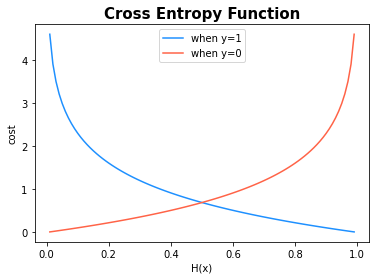

In [132]:
# TEST
x = np.arange(0.01, 1, 0.01)
y1 = -np.log(x)
y0 = -np.log(1-x)

plt.title('Cross Entropy Function', size=15, weight='bold')
plt.plot(x, y1, color='dodgerblue', label='when y=1')
plt.plot(x, y0, color='tomato', label='when y=0')
plt.xlabel('H(x)')
plt.ylabel('cost')
plt.legend(loc='upper center')
plt.show()

In [133]:
#x_trains = [0.1, 1, 2, 3, 4, 5]
#y_trains = [1.2, 3, 5, 7.5, 8.5, 12]
x_trains = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_trains = [[0], [0], [0], [1], [1], [1]]

# global logs
# logs = np.array([[], [], []])

In [134]:
W = tf.Variable(tf.random.normal([2, 1])) # weight
b = tf.Variable(tf.random.normal([1])) # bias

#print('#weight', W.numpy(), '#bias', b.numpy())

In [135]:
# Hypothesis: Logistic regression 
# 기존 Linear Regression의 Hypothesis를 Sigmoid function에 넣어버린 것과 같은 형태
# tf.matmul() 행렬곱
# tf.sigmoid() == 0과 1 사이의 값을 만들기 위한 시그모이드 함수
def H(x):
  return tf.sigmoid(tf.matmul(x, W) + b)


In [136]:
# Cost(loss) function: CROSS ENTROPY   -ylog(H(x)) - (1-y)log(1-H(x))
# reduce_mean=특정 차원 제거한 평균
def Cost(predicted, real):
  return -tf.reduce_mean(real * tf.log(predicted) + (1 - real) * tf.log(1 - predicted))
  #return tf.reduce_mean(-real * tf.log(predicted) + (1 - real) * tf.log(1 - predicted))

In [137]:
# Optimizer: Gradient descent  W = W - a(dy / dW), b = b - a(dy / db)
def gd(x, y, learning_rate):
  # get gradient
  with tf.GradientTape(persistent=True) as g:
    loss = Cost(H(x), y)

  dy_dw = g.gradient(loss, W)
  dy_db = g.gradient(loss, b)
  
  W.assign_sub(learning_rate * dy_dw)
  b.assign_sub(learning_rate * dy_db)

  # for plot
  #global logs
  #logs = np.append(logs, np.array([[loss.numpy()], W.numpy(), b.numpy()]), axis=1)

In [138]:
# training function
def train(x, y, learning_rate=0.01, epoch=200):
  for i in range(epoch):
    gd(x, y, learning_rate)

In [139]:
# run
train(x_trains, y_trains, 0.01, 200)
print('Model H(x) = {}x + {}'.format(W.numpy()[0], b.numpy()[0])) # W=2, v=0

InvalidArgumentError: ignored

In [ ]:
W + 7 + b

In [ ]:
# orignal data
plt.plot(x_trains, y_trains, 'bo', label='Orignal')
# trained data
for i in range(len(logs[1])-1):
  plt.plot(x_trains, np.array(logs[1][i]) * x_trains + np.array(logs[2][i]), 'y--' )
# final model
plt.plot(x_trains, W * x_trains + b, 'r-', label='Model')
plt.legend()
#draw
plt.xlabel('x')
plt.ylabel('H(x)')
plt.axhline(y=0)
plt.axvline(x=0)
plt.grid(True)
plt.show()

In [ ]:
# cost logs
plt.plot(range(len(logs[0])), logs[0])
plt.xlabel('Epoch')
plt.ylabel('Cost(loss)')
plt.show()